# Data Preprocessing

In [38]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics.pairwise import cosine_similarity
import pickle
warnings.filterwarnings('ignore')

In [2]:
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [3]:
# loading datasets

books=pd.read_csv('Books.csv')

users=pd.read_csv('Users.csv')

ratings=pd.read_csv('Ratings.csv')

In [4]:
# shapes of datasets

print('Shape of books is ',books.shape)
print('Shape of users is ',users.shape)
print('Shape of ratings is ',ratings.shape)



Shape of books is  (271360, 8)
Shape of users is  (278858, 3)
Shape of ratings is  (1149780, 3)


In [5]:
# basic info 

print(books.info())
print('-'*60)
print(users.info())
print('-'*60)
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age     

In [6]:
# missing values
print(books.isnull().sum())
print('-'*60)
print(users.isnull().sum())
print('-'*60)
print(ratings.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
------------------------------------------------------------
User-ID          0
Location         0
Age         110762
dtype: int64
------------------------------------------------------------
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [7]:
# duplicate values

print('Duplicate rows in books : ',books.duplicated().sum())
print('Duplicate rows in users : ',users.duplicated().sum())
print('Duplicate rows in ratings : ',ratings.duplicated().sum())

Duplicate rows in books :  0
Duplicate rows in users :  0
Duplicate rows in ratings :  0


In [8]:
# basic stats (books has no numerical columns)

users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [9]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [10]:
# categorical column statistics
books.describe(include=['O'])

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [11]:
users.describe(include=['O'])

,Location
count,278858
unique,57339
top,"london, england, united kingdom"
freq,2506


In [12]:
# 3 columns have year, publisher and image urls interchanged  
books[(books['Year-Of-Publication']=='DK Publishing Inc')|(books['Year-Of-Publication']=='Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


# Initial Insights
## 1. Books
    a. Categorical columns - NA
    b. Numerical Columns - Year , It is also typed as object as some entries of year has been interchanged with publisher
    c. Unique Identifier Columns - ISBN, Book Title
    d. Rest others are Object columns and three link columns for images
    e. 3 columns have interchanged values
    f. Year of Publication should be a numerical column
    g. ISBN will not be an important column for us might as well drop it later
## 2. Users
    a. Categorical columns - NA
    b. Numerical columns - Age
    c. User Id is identifier. Not of much use
    d. Location is object type(string)
    e. User age goes upto 244 , there is something wrong with the age. Lots of missing values. This column is of less importance, might not need to be fixed. 
## 3. Ratings
    a. Categorical columns - NA
    b. Numerical - Book-Rating
    c. User Id and ISBN are not that important.
    d. No missing values.
    e. More than half of the books have zero rating
    

In [13]:
# correcting the above problem (this code is specific to this dataset. I used it after studying the dataset)

# correcting year for the three rows
books['Year-Of-Publication']=books['Year-Of-Publication'].map(lambda x: '2000' if x=='DK Publishing Inc' else ('2003' if x=='Gallimard' else x))

# correcting author for the three rows
books['Book-Author']=books['Book-Author'].map(lambda x: 'NA' if x in ['2000','2003'] else x)

# correcting publisher for the three crows
books['Publisher']=books["Publisher"].map(lambda x : 'DK Publishing Inc' if x in ['https://images.amazon.com/images/P/078946697X.0','https://images.amazon.com/images/P/0789466953.0'] else ('Gallimard' if x=='https://images.amazon.com/images/P/2070426769.0' else x))

# adding image URL for the 3 rows
books.loc[books['ISBN']=='078946697X','Image-URL-L']='https://images.amazon.com/images/P/078946697X.0'
books.loc[books['ISBN']=='2070426769','Image-URL-L']='https://images.amazon.com/images/P/2070426769.0'
books.loc[books['ISBN']=='0789466953','Image-URL-L']='https://images.amazon.com/images/P/0789466953.0'

# EDA

### Not much EDA can be performed on these datasets. We will still perform some basic EDA.

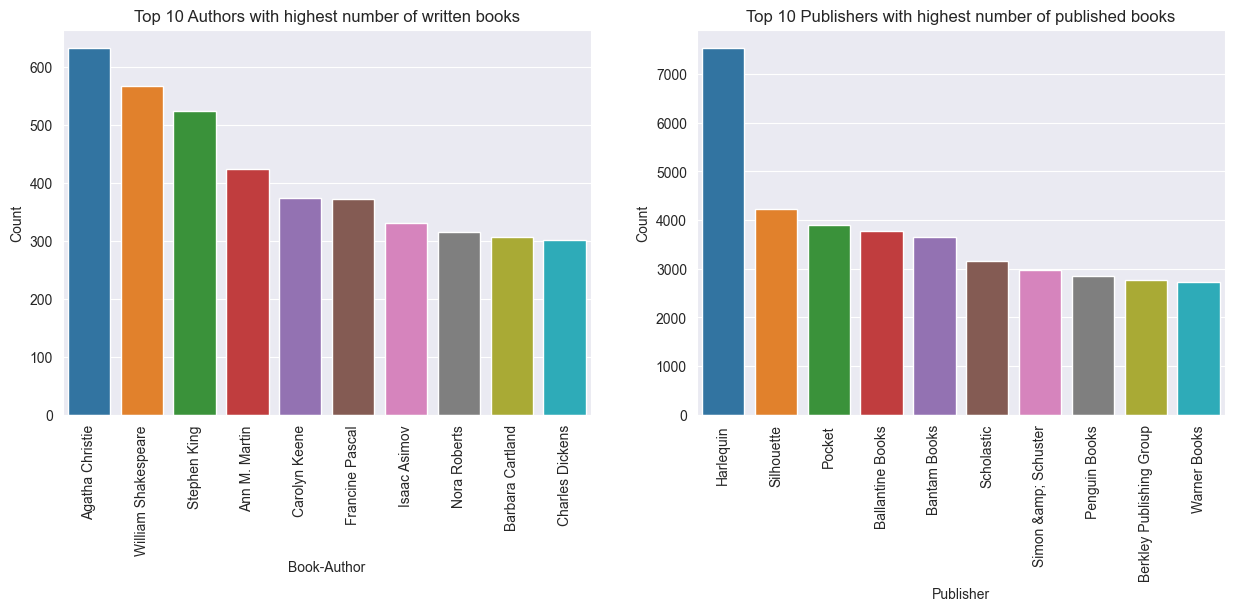

In [14]:
# Books

# setting dark grid
sns.set_style('darkgrid')

# top 10 authors and publishers
authors=books['Book-Author'].value_counts().sort_values(ascending=False)[:10]
publishers=books['Publisher'].value_counts().sort_values(ascending=False)[:10]

# defining a large figure for subplots
plt.figure(figsize=(15,5))

# first subplot
plt.subplot(1,2,1,title='Top 10 Authors with highest number of written books')
sns.barplot(x=authors.index,y=authors.values)
plt.ylabel('Count')
plt.xticks(rotation = 90);

#c second subplot
plt.subplot(1,2,2,title='Top 10 Publishers with highest number of published books')
sns.barplot(x=publishers.index,y=publishers.values)
plt.ylabel('Count')
plt.xticks(rotation = 90);

Text(0, 0.5, 'Count')

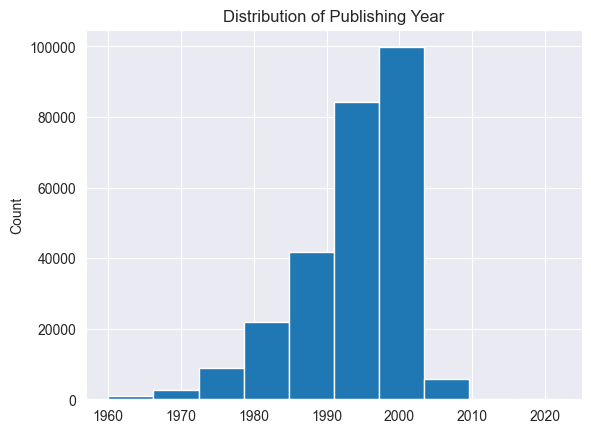

In [15]:
# histogram for year of  publishing
plt.hist(books['Year-Of-Publication'].astype('int'),range=(1960,2022),bins=10);
plt.title('Distribution of Publishing Year')
plt.ylabel('Count')

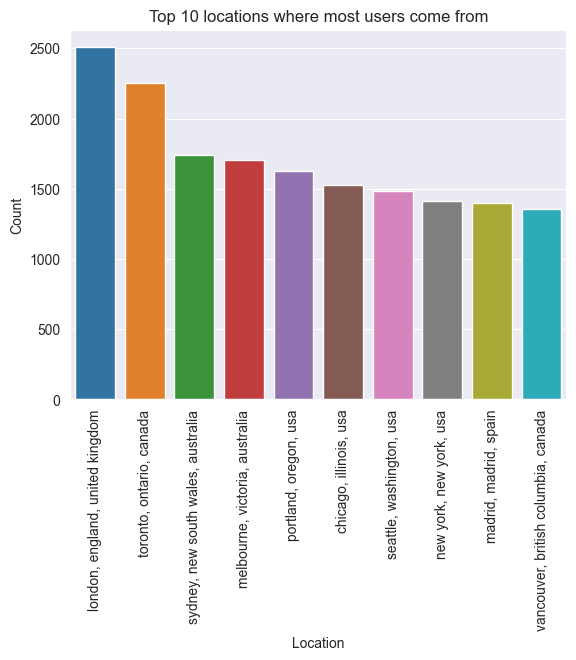

In [16]:
# users

# top 10 locations where users are from
locations=users['Location'].value_counts().sort_values(ascending=False)[:10]


sns.barplot(x=locations.index,y=locations.values)
plt.xticks(rotation = 90);
plt.title('Top 10 locations where most users come from')
plt.ylabel('Count');


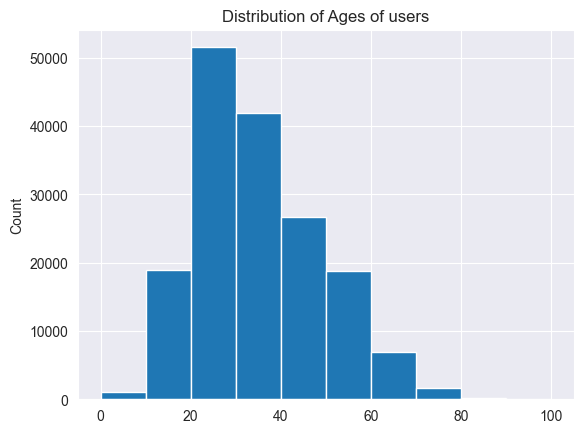

In [17]:
# users age histogram
plt.hist(users['Age'],bins=10,range=(0,100));
plt.ylabel('Count')
plt.title('Distribution of Ages of users');

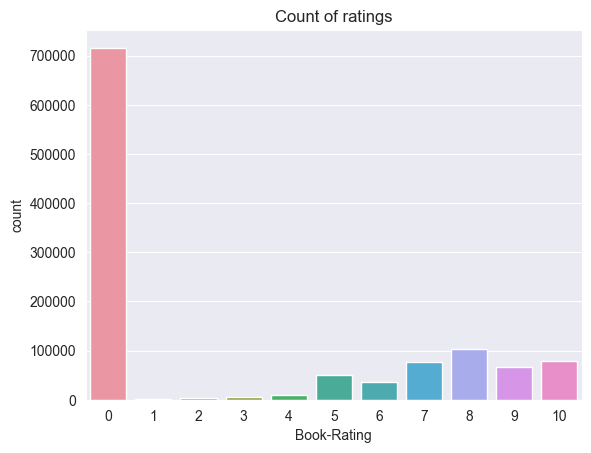

In [18]:
# ratings is a discrete numerical feature
sns.countplot(x=ratings['Book-Rating'])
plt.title('Count of ratings');

# Popularity based system
     1. Only those books will be considered which have highest average ratings but have atleat 250 ratings given in total.
     

In [27]:
# creating dataframe by merging() ratings and books dataframe and counting how many times a book has been rated.
books_with_ratings=ratings.merge(books,on='ISBN')

# grouping by Book name and counting the number of times it has been rated
books_with_ratings_count=books_with_ratings.groupby('Book-Title').count()[['ISBN']].reset_index()
books_with_ratings_count

,Book-Title,ISBN
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [29]:
# changing column name and sorting according to most number of ratings
books_with_ratings_count.rename(columns={'ISBN':'Number of Ratings'}, inplace=True)

# getting books that have been rated more than 250 times
books_with_ratings_count=books_with_ratings_count[books_with_ratings_count['Number of Ratings']>250]

books_with_ratings_count

,Book-Title,Number of Ratings
764,1984,284
818,1st to Die: A Novel,509
1048,2nd Chance,356
1760,A Bend in the Road,346
2281,"A Child Called \It\"": One Child's Courage to S...",265
...,...,...
233850,White Oleander : A Novel,387
233851,White Oleander : A Novel (Oprah's Book Club),356
234740,Wicked: The Life and Times of the Wicked Witch...,326
234951,Wild Animus,2502


In [37]:
# merging this dataframe with books with ratings to get mean ratings of each book

# grouping books by title and calculating mean ratings
mean_book_ratings=books_with_ratings.groupby('Book-Title')[['Book-Rating']].mean()

# merging number of ratings and mean rating of books with book title
books_with_mean_ratings=books_with_ratings_count.merge(mean_book_ratings,on='Book-Title')

# getting 50 top books with highest average ratings and atleast 250 ratings
popular_books=books_with_mean_ratings.sort_values(by='Book-Rating',ascending=False).iloc[:50]

# dropping duplicates (There are some books with different ISBNs but same title)
popular_books=popular_books.merge(books,on='Book-Title').drop_duplicates('Book-Title')

popular_books

,Book-Title,Number of Ratings,Book-Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.700000,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...


# Collaborative Filtering
    1. We need to make a data frame like a crosstab between books and users
    2. We will select only those books which have been rated at leaste 50 times
    3. We will select only those users which have rated books at least 200 times.
    4. These numbers are a result of experimenting with tha data and they yield the best results

In [39]:
# grouping users by user id and counting how many times each user has rated books
selected_users=books_with_ratings.groupby('User-ID').count()[['Book-Rating']]

In [40]:
# Getting user id of users who have rated more than 200 books
selected_users=selected_users[selected_users['Book-Rating']>200].index
selected_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [41]:
# getting books rated by each user 
filtered_ratings=books_with_ratings[books_with_ratings['User-ID'].isin(selected_users)]
filtered_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [42]:
# making a list of books which have been rated more than 50 times
selected_books=filtered_ratings.groupby('Book-Title').count()[['Book-Rating']]
selected_books=selected_books[selected_books['Book-Rating']>=50]
selected_books=selected_books.index
selected_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [43]:
# final dataframe with users that have rated more than 200 books and obly thise books that thave been rated more than 50 times
final_ratings=filtered_ratings[filtered_ratings['Book-Title'].isin(selected_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [44]:
# creating pivot table of Books and users 
books_users= final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
books_users.fillna(0,inplace=True)
books_users

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# getting similarity scores using cosine similarity

# consider this as a 810 dimensional plane and getting distance of different books from each other, books with smallest distance between them
# are the most similar
similarity_score=cosine_similarity(books_users)
similarity_score.shape

(706, 706)

In [46]:
# checking the recommender system
def recommend_book(book_name):
    
    # getting index of the book from the pivot table 
    index=np.where(books_users.index==book_name)[0][0]

    # getting  5 most similar books according to similarity scores calculated above
    similar_items=sorted(list(enumerate(similarity_score[index])), key= lambda x: x[1],reverse=True)[1:6]

    # printing the 5 most similar books
    for i in similar_items:
        print(books_users.index[i[0]])
recommend_book('A Day Late and a Dollar Short')

Exclusive
The Simple Truth
We Were the Mulvaneys
Icy Sparks
Disclosure


In [66]:
# droping the duplicate books  (same title) from the original books database
final_books=books.drop_duplicates('Book-Title')

In [69]:
# pickling the required datasets
pickle.dump(popular_books,open('popular_books.pkl', 'wb'))
pickle.dump(books_users,open('books_users.pkl', 'wb'))
pickle.dump(final_books,open('books.pkl', 'wb'))
pickle.dump(similarity_score,open('similarity_score.pkl', 'wb'))